In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
methods = ['plink', 'linarg', 'linargHWE']
times = {x: 0 for x in methods}

method = 'plink'
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
    times[method] += float(df.wall_time_seconds)

method = 'linarg'
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
    times[method] += np.sum(df.load_time) + np.sum(df.gwas_time)
    
    
method = 'linargHWE'
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
    times[method] += np.sum(df.load_time) + np.sum(df.gwas_time)
    
times

/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_50620/4219164320.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  times[method] += float(df.wall_time_seconds)
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_50620/4219164320.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  times[method] += float(df.wall_time_seconds)
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_50620/4219164320.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  times[method] += float(df.wall_time_seconds)


{'plink': 5294.34, 'linarg': 911.9029266599999, 'linargHWE': 523.3065684409964}

In [3]:
df

,chr,partition,load_time,load_memory,gwas_time,gwas_memory
0,21,0_chr21-5030618-25863389,7.256518,1459.421875,15.772756,5780.199219
1,21,1_chr21-25863390-46696162,8.814951,1944.843750,20.105162,7861.609375


In [4]:
chrom=11

method = 'linarg'
df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
print(np.sum(df.load_time) + np.sum(df.gwas_time))

method = 'plink'
df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
df

316.4657304329999


,run,wall_time_seconds,peak_memory_MB
0,1,1858.78,3538.75


In [5]:
df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')

In [6]:
methods = ['linarg', 'linargHWE']

for method in methods:
    print(method)
    load_time = 0
    gwas_time = 0
    for chrom in [1, 11, 21]:
        df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4c/data/gwas_{method}_chr{chrom}.csv')
        load_time += np.mean(df.load_time)
        gwas_time += np.mean(df.gwas_time)
    print(f'load_time: {load_time}')
    print(f'gwas_time: {gwas_time}')

linarg
load_time: 46.22880134916666
gwas_time: 92.56320685233331
linargHWE
load_time: 23.613643606665285
gwas_time: 56.7367966054162


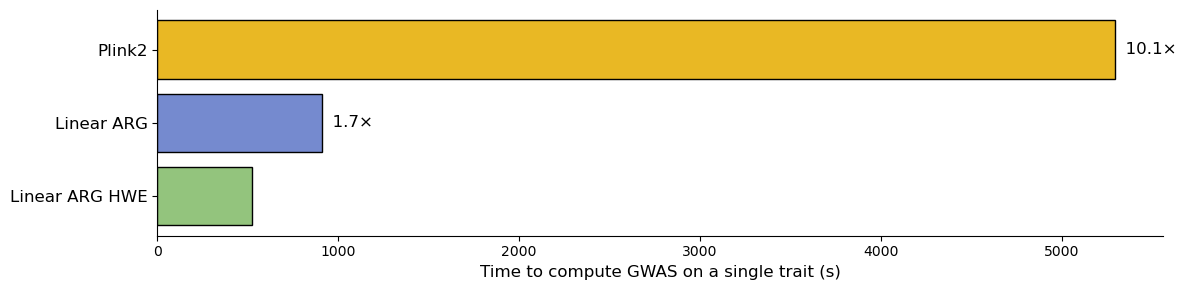

In [7]:
colors = ['#E9B824', '#758acfff', '#93c47d']

methods = ['plink', 'linarg', 'linargHWE']
y = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(12, 3))


for i in range(len(methods)):
        ax.barh(y[i], times[methods[i]], 
            color=colors[i], 
            hatch='', 
            edgecolor='black', 
            label='Total time' if i == 0 else "")


# Set y-axis labels and reverse order
ax.set_yticks(y)
ax.set_yticklabels(['Plink2', 'Linear ARG', 'Linear ARG HWE'], fontsize=12)
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Time to compute GWAS on a single trait (s)', fontsize=12)

all_times = [times[m] for m in methods]
linarg_time = all_times[-1]
for i in range(len(all_times)-1):  # Only for scipy and grg
    speedup = all_times[i] / linarg_time
    ax.text(all_times[i] + 0.05, y[i], f"  {speedup:.1f}×", va='center', fontsize=12)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

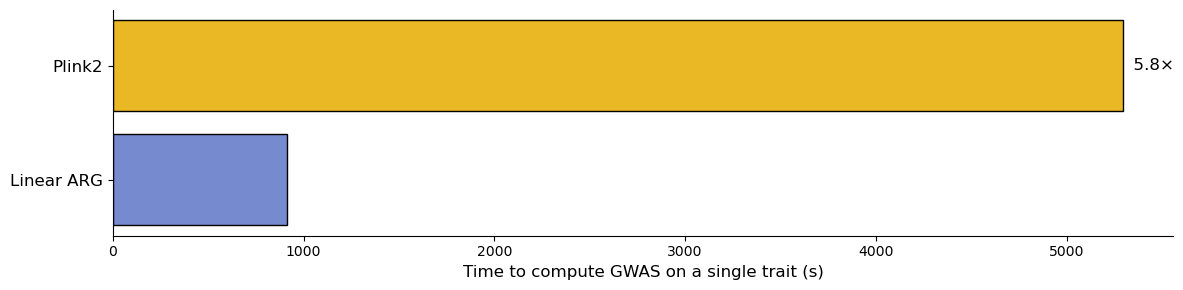

In [8]:
colors = ['#E9B824', '#758acfff']

methods = ['plink', 'linarg']
y = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(12, 3))


for i in range(len(methods)):
        ax.barh(y[i], times[methods[i]], 
            color=colors[i], 
            hatch='', 
            edgecolor='black', 
            label='Total time' if i == 0 else "")


# Set y-axis labels and reverse order
ax.set_yticks(y)
ax.set_yticklabels(['Plink2', 'Linear ARG'], fontsize=12)
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Time to compute GWAS on a single trait (s)', fontsize=12)

all_times = [times[m] for m in methods]
linarg_time = all_times[-1]
for i in range(len(all_times)-1):  # Only for scipy and grg
    speedup = all_times[i] / linarg_time
    ax.text(all_times[i] + 0.05, y[i], f"  {speedup:.1f}×", va='center', fontsize=12)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()